<a href="https://colab.research.google.com/github/tejuedidi/machine-learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Heart Disease using Logistic Regression (Binary Classification)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Heart.csv to Heart.csv


In [54]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [55]:
df = pd.read_csv(io.BytesIO(uploaded['Heart.csv']))
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


Data Pre-Processing

In [56]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [57]:
df = df.drop(columns = 'Unnamed: 0')
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [58]:
# converting string values to numeric values via label encoding
df['ChestPain'] = df['ChestPain'].astype('category') # fn conversting columns to categorical data type
df['ChestPain'] = df['ChestPain'].cat.codes # assigns unique numerical code to each category in column

df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes

df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [59]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

In [60]:
df = df.dropna()

x = independent and y = dependent (AHD)

In [61]:
X = df.drop(columns= 'AHD')
y = df['AHD']
X,y

(     Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
 0     63    1          3     145   233    1        2    150      0      2.3   
 1     67    1          0     160   286    0        2    108      1      1.5   
 2     67    1          0     120   229    0        2    129      1      2.6   
 3     37    1          1     130   250    0        0    187      0      3.5   
 4     41    0          2     130   204    0        2    172      0      1.4   
 ..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
 297   57    0          0     140   241    0        0    123      1      0.2   
 298   45    1          3     110   264    0        0    132      0      1.2   
 299   68    1          0     144   193    1        0    141      0      3.4   
 300   57    1          0     130   131    0        0    115      1      1.2   
 301   57    0          2     130   236    0        2    174      0      0.0   
 
      Slope   Ca  Thal  
 0        3  

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 21)

In [63]:
# use scalar to make data points in closer range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit calculates mean and standard deviation of data
X_test_scaled = scaler.transform(X_test)

In [64]:
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)

In [65]:
log_reg.predict(X_train_scaled)

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int8)

In [66]:
log_reg.score(X_train_scaled, y_train)

0.8661087866108786

In [67]:
log_reg.score(X_test_scaled, y_test)

0.85

given our current accuracy score, imporve parameters to see if prediction can be more accurate

In [68]:
# C = regularization, default = 1
log_reg1 = LogisticRegression(random_state = 0, C = 1, fit_intercept = True).fit(X_train_scaled, y_train)

In [69]:
log_reg1.score(X_train_scaled, y_train)

0.8661087866108786

In [70]:
log_reg1.score(X_test_scaled, y_test)

0.85

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


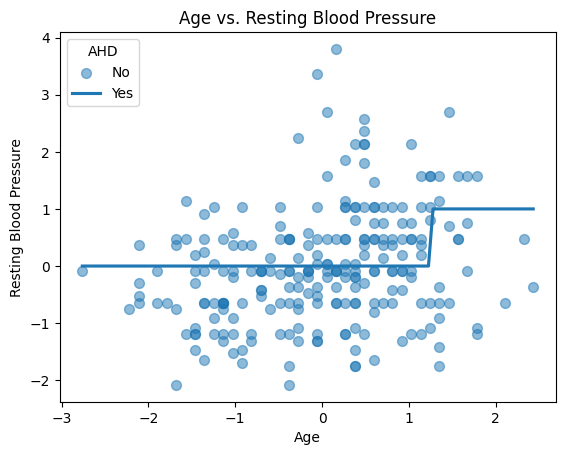

In [73]:
# Concatenate X_train_scaled and y_train to create a DataFrame for plotting
train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
train_df['AHD'] = y_train

# Create a scatter plot with regression lines and hue encoding the 'AHD' column
sns.regplot(x='Age', y='RestBP', data=train_df, logistic=True, scatter_kws={'s': 50, 'alpha': 0.5}, ci=None)
plt.title('Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(title='AHD', loc='upper left', labels=['No', 'Yes'])
plt.show()